In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [3]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
from pandas import ExcelFile

In [5]:
df = pd.read_excel('APH Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,46800,46880,47120,46080,618.63K,-0.0017
1,2021-07-02,45600,46640,46800,45520,601.00K,-0.0256
2,2021-07-05,44240,45600,45760,43680,1.89M,-0.0298
3,2021-07-06,44160,44240,45040,44080,2.01M,-0.0018
4,2021-07-07,44160,44160,44800,43360,1.93M,0.0000


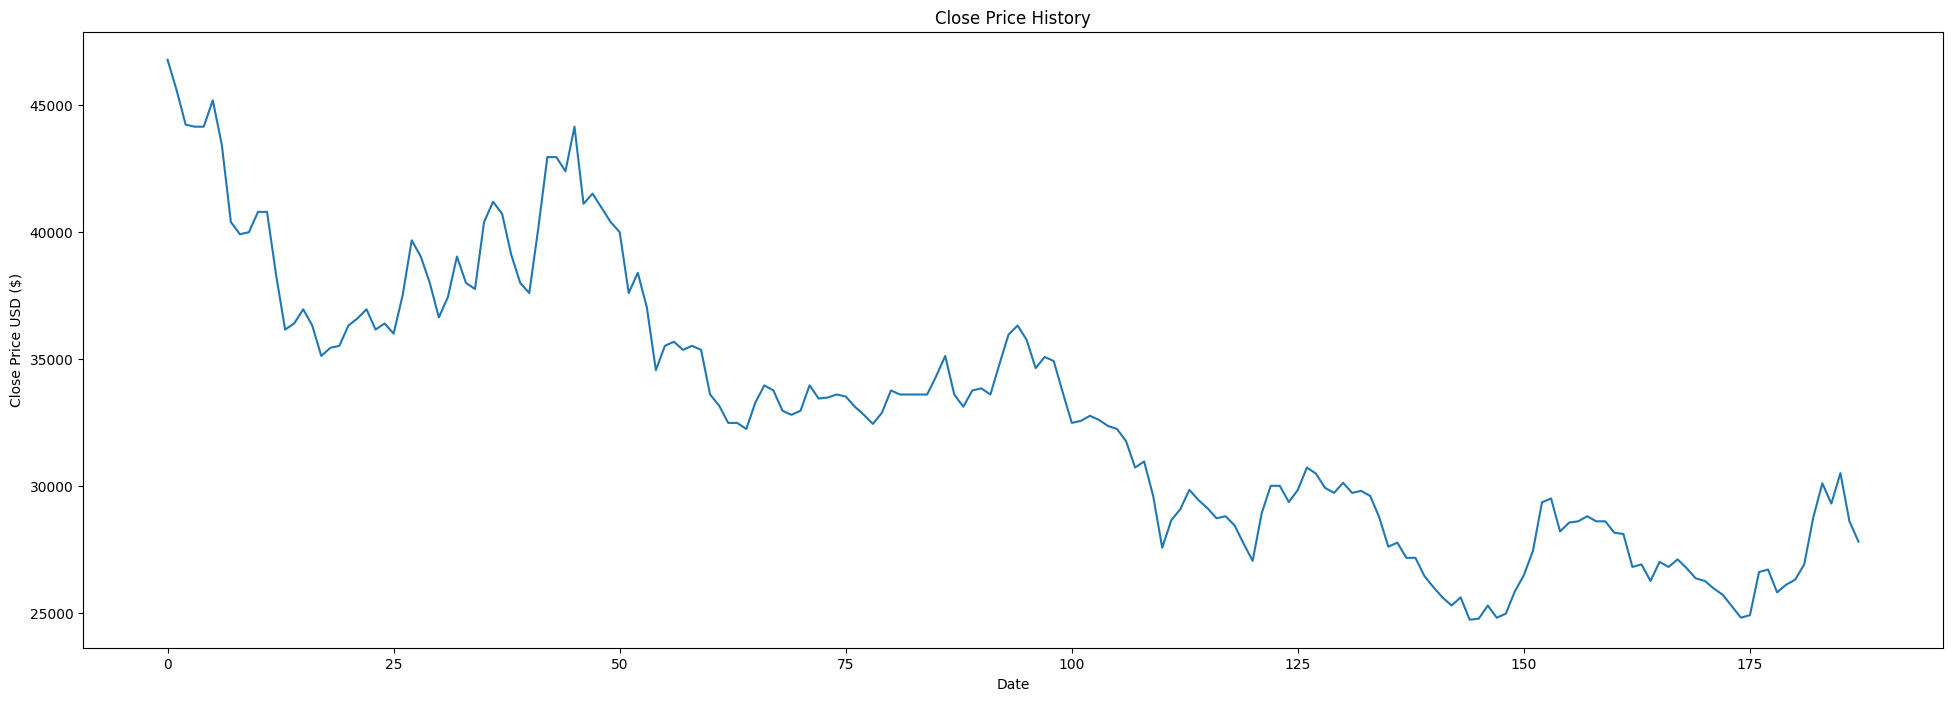

In [6]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [7]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [8]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.        ],
       [0.94565217],
       [0.88405797],
       [0.88043478],
       [0.88043478],
       [0.92753623],
       [0.84782609],
       [0.71014493],
       [0.6884058 ],
       [0.69202899],
       [0.72826087],
       [0.72826087],
       [0.61594203],
       [0.51811594],
       [0.52898551],
       [0.55434783],
       [0.52536232],
       [0.47101449],
       [0.48550725],
       [0.48913043],
       [0.52536232],
       [0.53804348],
       [0.55434783],
       [0.51811594],
       [0.52898551],
       [0.51086957],
       [0.57971014],
       [0.67753623],
       [0.64855072],
       [0.60144928],
       [0.53985507],
       [0.57608696],
       [0.64855072],
       [0.60144928],
       [0.59057971],
       [0.71014493],
       [0.74637681],
       [0.72463768],
       [0.65217391],
       [0.60144928],
       [0.58333333],
       [0.69927536],
       [0.82608696],
       [0.82608696],
       [0.80072464],
       [0.88043478],
       [0.74275362],
       [0.760

In [9]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i <= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([1.        , 0.94565217, 0.88405797, 0.88043478, 0.88043478,
       0.92753623, 0.84782609, 0.71014493, 0.6884058 , 0.69202899,
       0.72826087, 0.72826087, 0.61594203, 0.51811594, 0.52898551,
       0.55434783, 0.52536232, 0.47101449, 0.48550725, 0.48913043,
       0.52536232, 0.53804348, 0.55434783, 0.51811594, 0.52898551,
       0.51086957, 0.57971014, 0.67753623, 0.64855072, 0.60144928,
       0.53985507, 0.57608696, 0.64855072, 0.60144928, 0.59057971,
       0.71014493, 0.74637681, 0.72463768, 0.65217391, 0.60144928,
       0.58333333, 0.69927536, 0.82608696, 0.82608696, 0.80072464,
       0.88043478, 0.74275362, 0.76086957, 0.73550725, 0.71014493,
       0.69202899, 0.58333333, 0.61956522, 0.55797101, 0.44565217,
       0.48913043, 0.49637681, 0.48188406, 0.48913043, 0.48188406])]
[0.40217391304347827]

[array([1.        , 0.94565217, 0.88405797, 0.88043478, 0.88043478,
       0.92753623, 0.84782609, 0.71014493, 0.6884058 , 0.69202899,
       0.72826087, 0.72826087, 0.61

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0101
Epoch 2/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0074
Epoch 3/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 4/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 5/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 6/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0036
Epoch 7/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0040
Epoch 8/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0037
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0033
Epoch 10/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0043
Epoch 11/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0039
Epoch 12/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0038
Epoch 13/25
66/66 [==================

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 18ms/step


1039.7651377646298

C:\Users\DELL\AppData\Local\Temp\ipykernel_43228\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


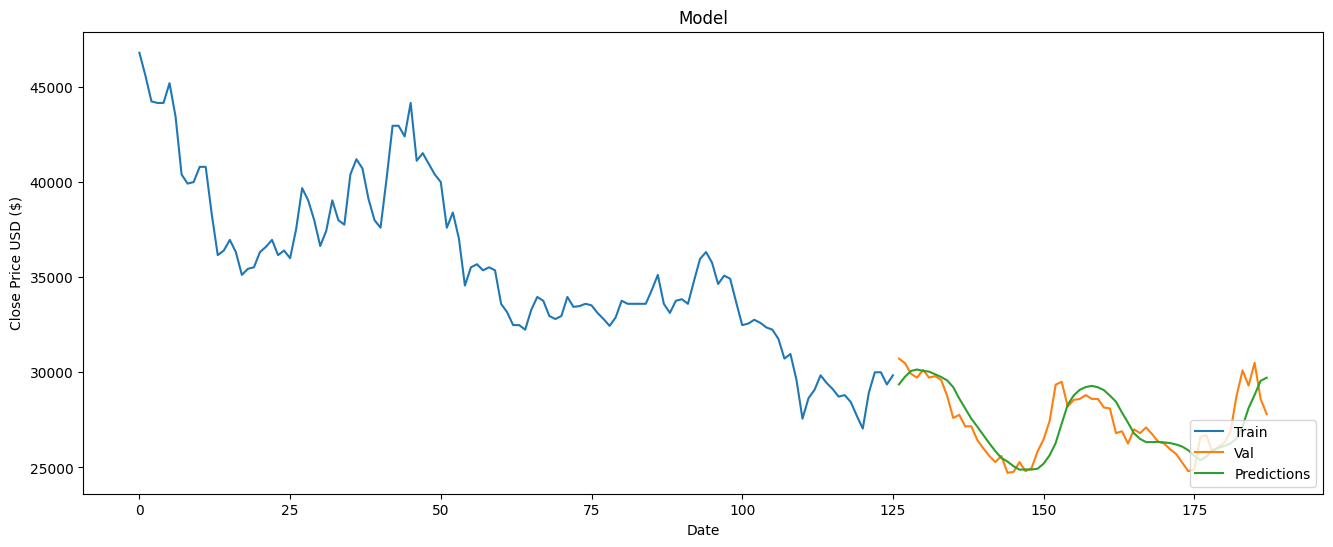

In [12]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()